# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [2]:
# Load pickled data
import pickle

training_file = "/home/workspace/data/train.p"
validation_file="/home/workspace/data/valid.p"
testing_file = "/home/workspace/data/test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']


assert(len(X_train) == len(y_train))
assert(len(X_valid) == len(y_valid))
assert(len(X_test) == len(y_test))

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [3]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results
import numpy as np
# Number of training examples
n_train = len(X_train)

# Number of validation examples
n_validation = len(X_valid)

# Number of testing examples.
n_test = len(X_test)

# What's the shape of an traffic sign image?
image_shape = X_train[0].shape
assert(len(X_train) == len(y_train))
assert(len(X_valid) == len(y_valid))
assert(len(X_test) == len(y_test))

# How many unique classes/labels there are in the dataset.
n_classes = len(np.unique(y_train))


print("Number of training examples =", n_train)
print("Number of validation examples =", n_validation)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Visualization of the dataset (Show random samples from dataset)

In [4]:
#Import Libraries
import matplotlib.pyplot as plt
import random
import pandas as pd
import numpy as np
%matplotlib inline

In [5]:
#Read labels from csv file
dataset = pd.read_csv('signnames.csv')
name_values = dataset.iloc[:, [1]].values
print(len(name_values))


43


In [6]:
#Function for Plotting
def plot_random_sample(images,labels,cols=2):
    #Set axis and fig 
    fig, axs = plt.subplots(int(len(images)/cols),cols, figsize=(10, 20))
    axs = axs.ravel()
    i = 0
    #Loop for showing images
    for _ in range (len(images)):
    
        axs[i].imshow(images[i])
        axs[i].axis('off')
        axs[i].set_title(labels[i])
        i += 1
        axs[i].imshow(images[i])
        axs[i].axis('off')
        axs[i].set_title(labels[i])
        i += 1
        #Break loop when i equal to number of images
        if i==len(images):
            return 0

0

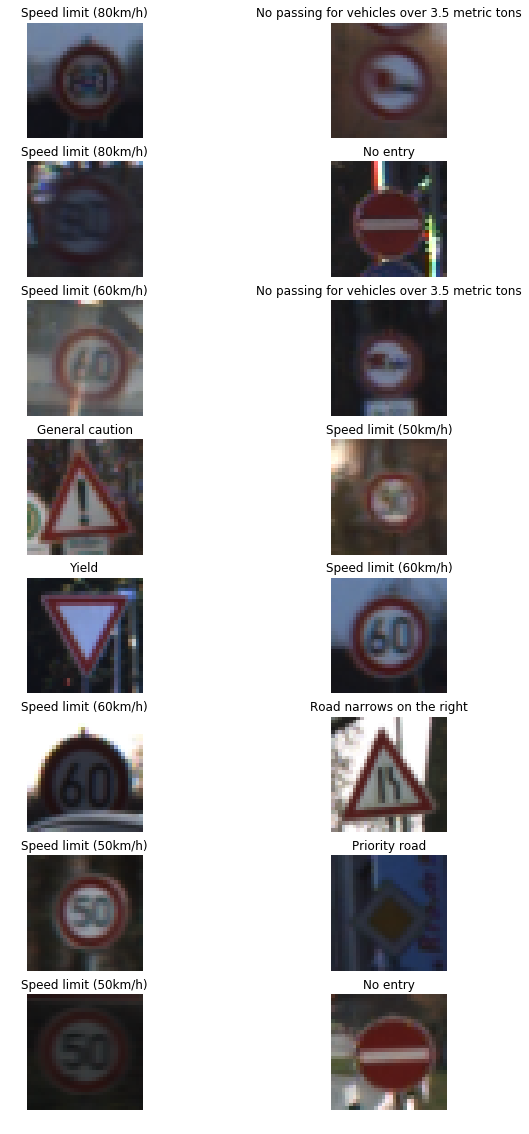

In [7]:
total_num_show=16 #It must be even number
cols=2  #Set the column. Must be even
#If the numbers above are chosen odd, the value return float
#and cause error

#Create array from random integers to select random images
newArray = np.random.randint(1, n_train, size=(1, total_num_show))

images_to_show = []
labels = []
#Create list from images and corresponding labels
for idx in range(total_num_show):
    images_to_show.append(X_train[newArray[0][idx]])
    labels.append(name_values[y_train[newArray[0][idx]]][0])
#Run function
plot_random_sample(images_to_show,labels,cols)


### Visualization of data (Create graph for number of classes)

In [8]:
# Import Counter lib
from collections import Counter
#Load csv file again with different name
ds_names = pd.read_csv('signnames.csv')
ds_names.set_index('ClassId',inplace=True)


def get_name_from_label(label):
    # Get label names by using pandas function 
    return ds_names.loc[label].SignName

#Create counter object from y_train

def show_class_graphs(data,data_name,data_count):
    counter = Counter(data)
    total_elements= list(counter.values())
    
    print("There are {} images in {} set and total number of images for each class: \n".format(data_count,data_name))
    for idx in range (len(total_elements)):
        print("{}: ".format(get_name_from_label(idx)),"{}".format(total_elements[idx])) 
    
    counts = pd.DataFrame(columns=['sign_label','Number of Images'],data=[(label, count) for label, count in counter.items()])
    counts['Labels'] = counts.sign_label.apply(get_name_from_label)
    ax = counts.plot(kind='barh',
                x='Labels',
                y='Number of Images',
                grid='on', 
                legend=False,
                title="{} Images Distribution".format(data_name),
                fontsize=15,
                figsize=(30,30)
                )

There are 12630 images in Test set and total number of images for each class: 

Speed limit (20km/h):  150
Speed limit (30km/h):  720
Speed limit (50km/h):  690
Speed limit (60km/h):  210
Speed limit (70km/h):  420
Speed limit (80km/h):  390
End of speed limit (80km/h):  690
Speed limit (100km/h):  480
Speed limit (120km/h):  390
No passing:  450
No passing for vehicles over 3.5 metric tons:  150
Right-of-way at the next intersection:  660
Priority road:  480
Yield:  90
Stop:  90
No vehicles:  60
Vehicles over 3.5 metric tons prohibited:  450
No entry:  720
General caution:  660
Dangerous curve to the left:  630
Dangerous curve to the right:  360
Double curve:  120
Bumpy road:  750
Slippery road:  450
Road narrows on the right:  150
Road work:  90
Traffic signals:  210
Pedestrians:  180
Children crossing:  150
Bicycles crossing:  120
Beware of ice/snow:  270
Wild animals crossing:  60
End of all speed and passing limits:  90
Turn right ahead:  150
Turn left ahead:  120
Ahead only:  90


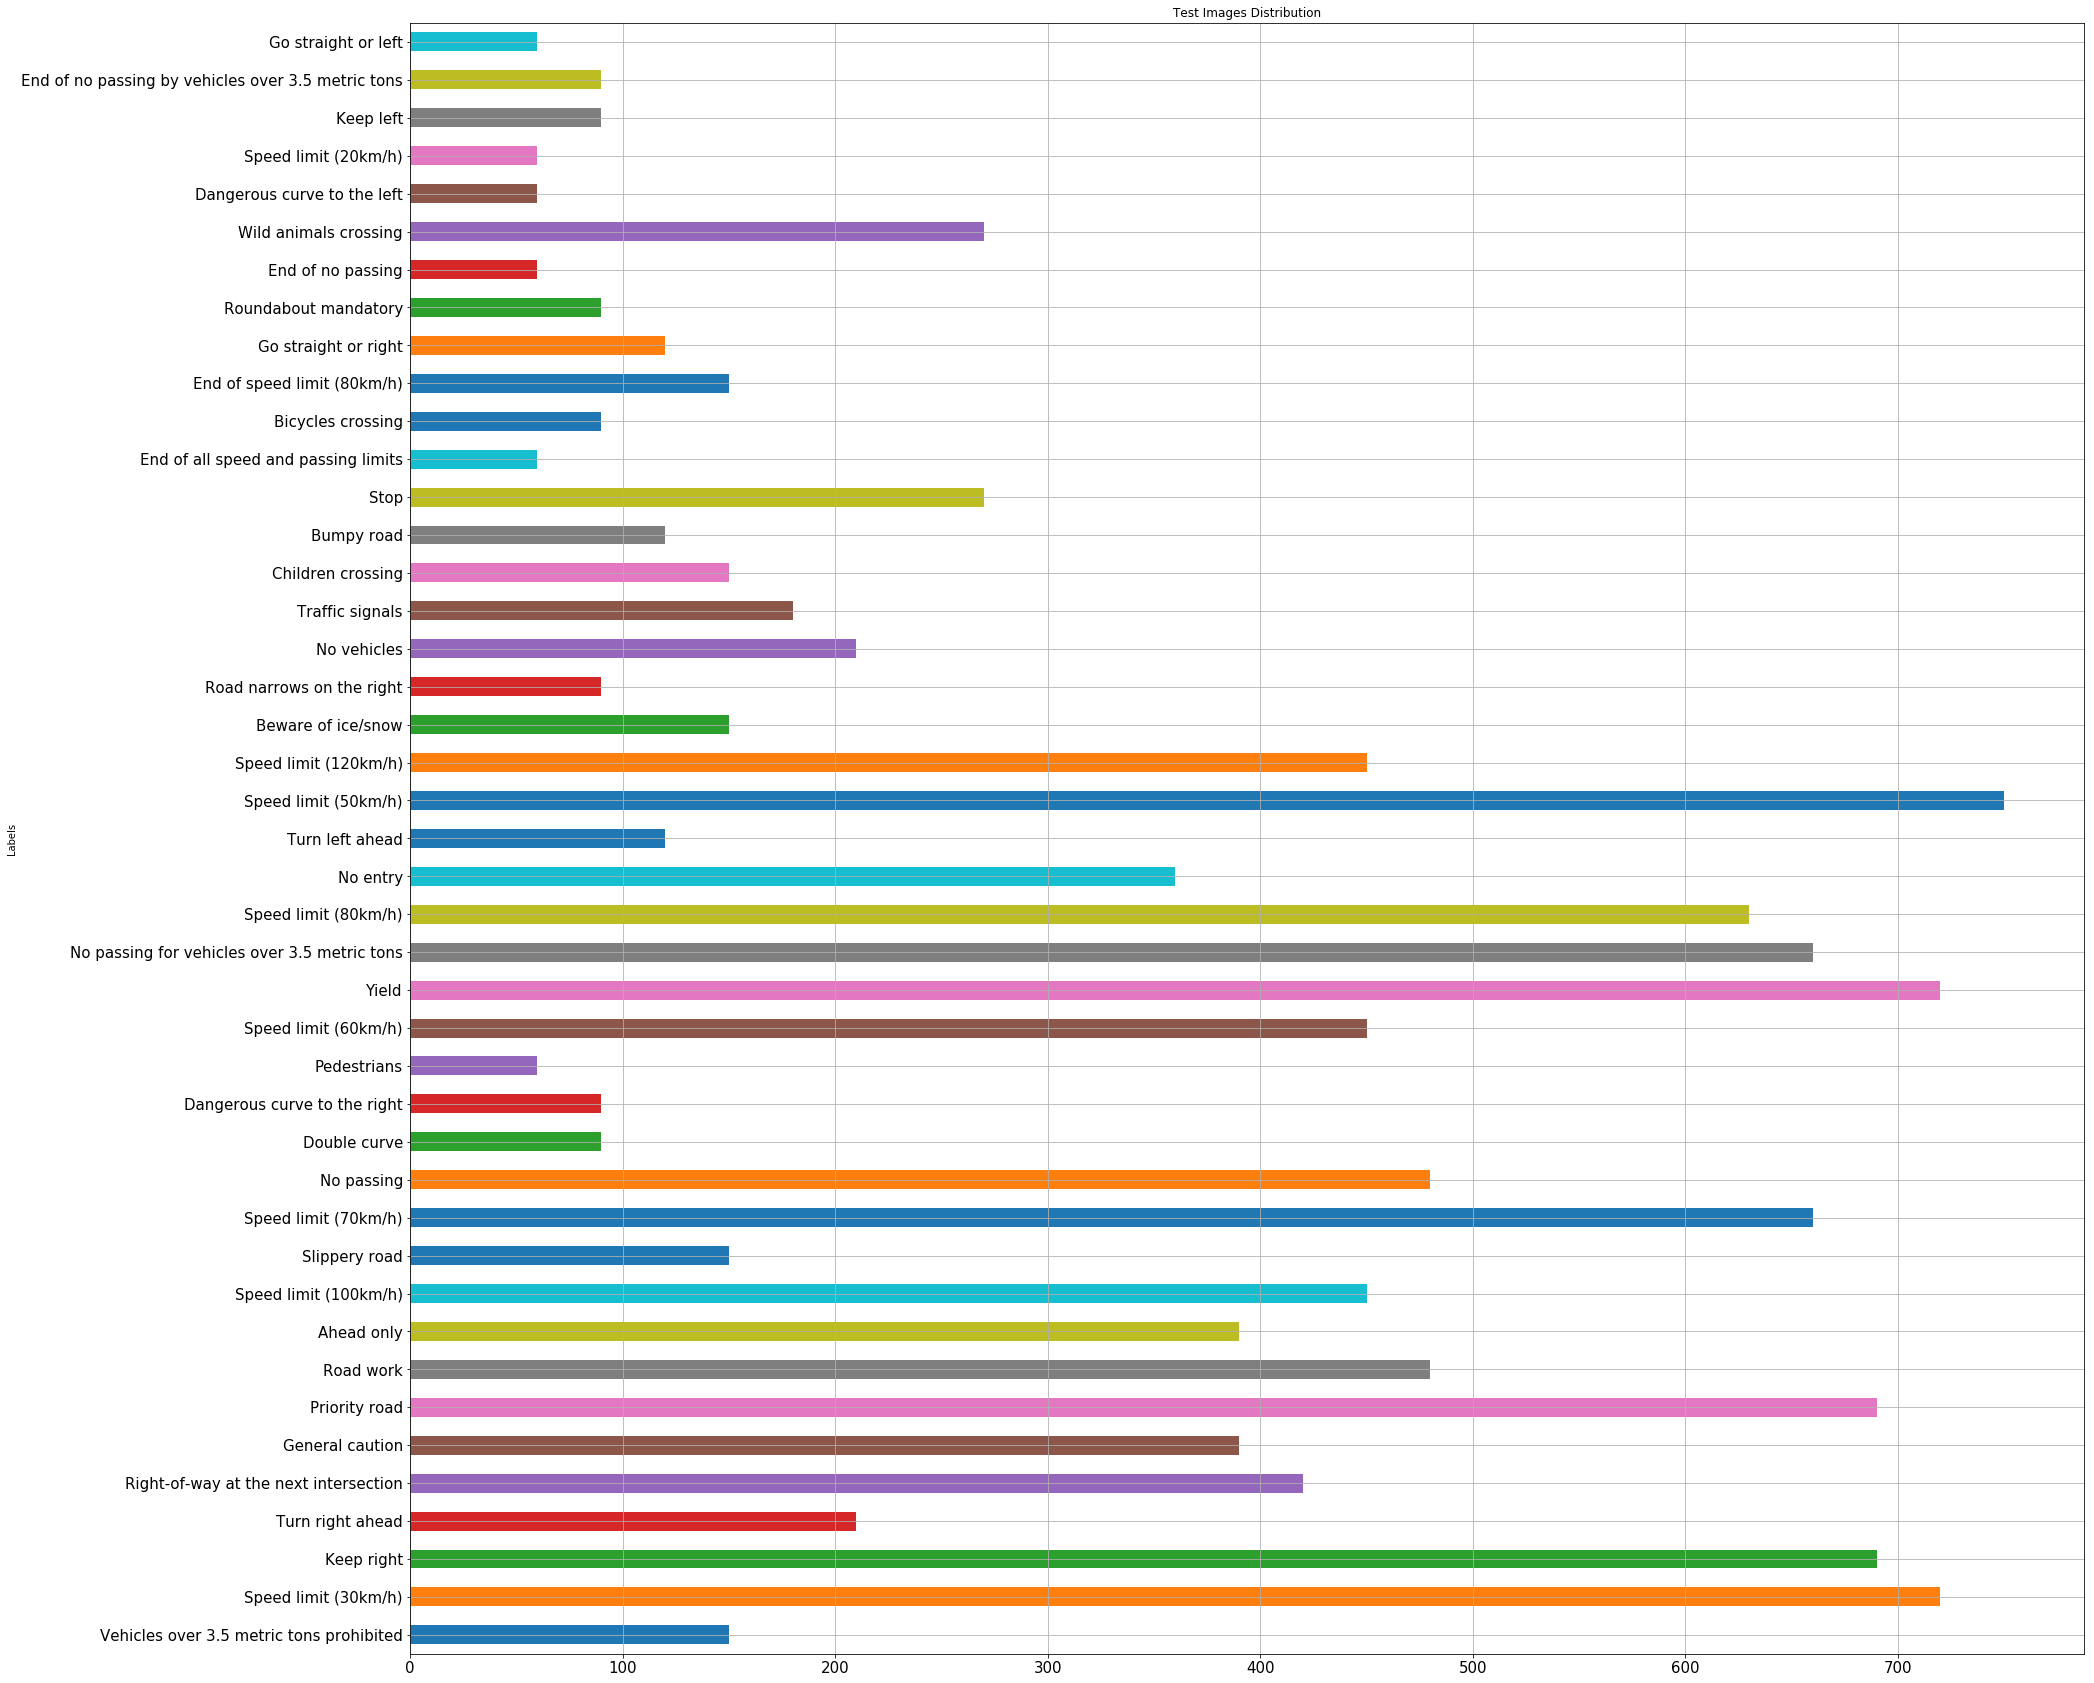

In [9]:
"""
Uncomment the line to look which data (test,train or validation) you want
"""
#show_class_graphs(y_train,"Train",n_train)
#show_class_graphs(y_valid,"Validation",n_validation)
show_class_graphs(y_test,"Test",n_test)

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [10]:
import cv2
from sklearn import preprocessing
from numpy import asarray
from skimage.transform import rescale, resize, downscale_local_mean,rotate

In [11]:
def normalize(img):
    """
    Normalize images
    """
    #return  np.array(img/255.0, dtype=np.float32)
    return np.array((img-128.0)/128.0, dtype=np.float32)

def convertGray(img):
    """
    Convert images to gray 
    """
    return cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)


def random_rotate_img(data,imgshp):
    """
    Rotate images by using opencv functions
    """
    c_x,c_y = int(imgshp.shape[0]/2), int(imgshp[0].shape[1]/2)
    def rotating(img,cx,cy):
        ang = 30.0*np.random.rand()-15
        Mat = cv2.getRotationMatrix2D((cx, cy), ang, 1.0)
        fin = cv2.warpAffine(img, Mat, img.shape[:2])
    return fin.reshape(32,32,1)
    rotats = [rotating(img) for img in data]
    
    return np.array(rotats)


def random_rotate(data):
    """
    Rotate images by using skimage funstion
    """
    def rotating_sec(img):
        ang  = 30.0*np.random.rand()-10
        rott = rotate(img, ang, resize=False, mode="edge")
        return rott.reshape(32,32,1)
    
    rotatings = [ rotating_sec(img) for img in data]
    
    return np.array(rotatings)


def sharpen_img(data):
    """
    Sharping images
    """
    
    def bluring(img):
        gb  = cv2.GaussianBlur(img, (7,7), 15.0)
        shp = cv2.addWeighted(img, 2, gb, -1, 0)
        return shp.reshape(32,32,1)
    
    sharps = [bluring(img) for img in data]
    return np.array(sharps) 

def horizontalFlip(data):
    """
    Horizontal flip
    """
    flips = [(cv2.flip(img, 1)).reshape(32,32,1) for img in data]
        
    return np.array(flips)
    
    

def normalize_gray_pipeline(data):
    """
    General Pipeline for normalize images and convert them to gray.
    
    """    
   
    def process(src):
            gray = convertGray(src)
            norm = normalize(gray)
            return norm.reshape(32,32,1)
    
    norms = [process(img) for img in data]
    return np.array(norms)
        
    

In [12]:
#Normalize and convert to gray all dataset (train,valid,test)
X_train_norm = normalize_gray_pipeline(X_train)
X_valid_norm = normalize_gray_pipeline(X_valid)
X_test_norm = normalize_gray_pipeline(X_test)

assert(len(X_train) == len(X_train_norm))
assert(len(X_valid) == len(X_valid_norm))
assert(len(X_test) == len(X_test_norm))

Text(0.5,1,'Normalized and Gray')

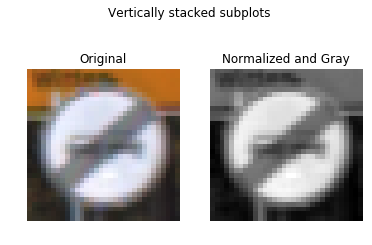

In [13]:
#Show
idx=141
fig, axs = plt.subplots(1,2)
fig.suptitle('Vertically stacked subplots')
axs[0].imshow(X_train[idx])
axs[0].axis('off')
axs[0].set_title("Original")
axs[1].imshow(X_train_norm[idx].squeeze(),cmap="gray")
axs[1].axis('off')
axs[1].set_title("Normalized and Gray")

In [14]:
#Flipping
X_train_flip = horizontalFlip(X_train_norm)
X_valid_flip = horizontalFlip(X_valid_norm)
X_test_flip  = horizontalFlip(X_test_norm)

#Sharping
X_train_sharp  =  sharpen_img(X_train_norm)
X_valid_sharp  =  sharpen_img(X_valid_norm)
X_test_sharp    =  sharpen_img(X_test_norm)

#Random rotating
X_train_rot  =  random_rotate(X_train_norm)
X_valid_rot  =  random_rotate(X_valid_norm)
X_test_rot    =  random_rotate(X_test_norm)


assert(len(X_train_norm) == len(X_train_flip))
assert(len(X_valid_norm) == len(X_valid_flip))
assert(len(X_test_norm) == len(X_test_flip))

assert(len(X_train_norm) == len(X_train_sharp))
assert(len(X_valid_norm) == len(X_valid_sharp))
assert(len(X_test_norm) == len(X_test_sharp))

assert(len(X_train_norm) == len(X_train_rot))
assert(len(X_valid_norm) == len(X_valid_rot))
assert(len(X_test_norm) == len(X_test_rot))

In [15]:
#Concatenating
data1_train= np.concatenate([X_train_norm, X_train_flip])
data2_train = np.concatenate([data1_train, X_train_sharp])
X_train_final = np.concatenate([data2_train, X_train_rot])

data1_valid = np.concatenate([X_valid_norm, X_valid_flip])
data2_valid = np.concatenate([data1_valid, X_valid_sharp])
X_valid_final = np.concatenate([data2_valid, X_valid_rot])

data1_test = np.concatenate([X_test_norm, X_test_flip])
data2_test = np.concatenate([data1_test, X_test_sharp])
X_test_final = np.concatenate([data2_test, X_test_rot])


print("Length of final dataset and total of augmented images (TRAIN)")
print(len(X_train_final))

print(".......")
print("Length of final dataset and total of augmented images (VALID)")
print(len(X_valid_final))

print(".......")
print("Length of final dataset and total of augmented images (TEST)")
print(len(X_test_final))



Length of final dataset and total of augmented images (TRAIN)
139196
.......
Length of final dataset and total of augmented images (VALID)
17640
.......
Length of final dataset and total of augmented images (TEST)
50520


In [16]:
y_train_final = np.concatenate([y_train, y_train,y_train,y_train])
y_valid_final = np.concatenate([y_valid, y_valid,y_valid,y_valid])
y_test_final = np.concatenate([y_test, y_test,y_test,y_test])


assert(len(y_train_final) == len(X_train_final))
assert(len(y_valid_final) == len(X_valid_final))
assert(len(y_test_final) == len(X_test_final))


(-0.5, 31.5, 31.5, -0.5)

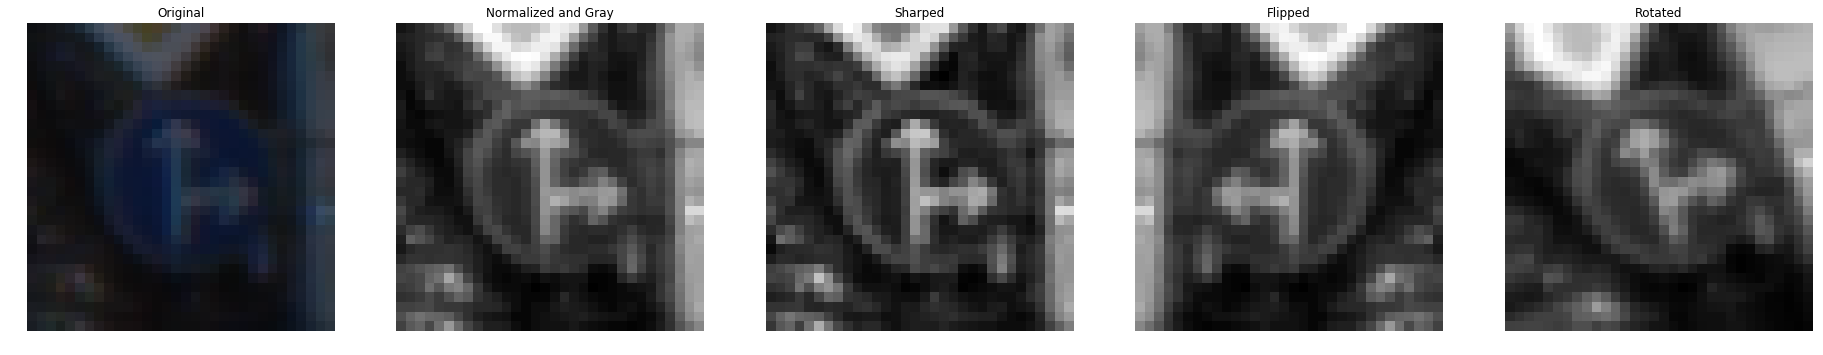

In [17]:
#Plotting Samples

#Set axis and fig 
fig, axs = plt.subplots(1,5, figsize=(32, 32))
axs = axs.ravel()

i=1003

axs[0].imshow(X_train[i].squeeze(),cmap="gray")
axs[0].set_title("Original")
axs[0].axis('off')

axs[1].imshow(X_train_norm[i].squeeze(),cmap="gray")
axs[1].set_title("Normalized and Gray")
axs[1].axis('off') 

axs[2].imshow(X_train_sharp[i].squeeze(),cmap="gray")
axs[2].set_title("Sharped")
axs[2].axis('off') 

axs[3].imshow(X_train_flip[i].squeeze(),cmap="gray")
axs[3].set_title("Flipped")
axs[3].axis('off')

axs[4].imshow(X_train_rot[i].squeeze(),cmap="gray")
axs[4].set_title("Rotated")
axs[4].axis('off')  

### Model Architecture

In [18]:
from sklearn.utils import shuffle

X_train_final, y_train_final = shuffle(X_train_final, y_train_final)


In [19]:
print(X_train_final.shape)
print(y_train_final.shape)

(139196, 32, 32, 1)
(139196,)


In [20]:
import tensorflow as tf
from tensorflow.contrib.layers import flatten

EPOCHS = 25
BATCH_SIZE = 128

In [21]:
#This is classic LeNet architecture which I wont use. 
def LeNet(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    # Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b
    
    # Activation.
    conv1 = tf.nn.relu(conv1)
    
    # Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')


    # Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b 
    
    # Activation.
    conv2 = tf.nn.relu(conv2)

    # Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # Flatten. Input = 5x5x16. Output = 400.
    fc0   = flatten(conv2)
            
    # Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W  = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # Activation.
    fc1 = tf.nn.relu(fc1)
    
    #Dropout
    fc1 = tf.nn.dropout(fc1, keep_prob)
    
    # Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b = tf.Variable(tf.zeros(84))
    fc2   = tf.matmul(fc1, fc2_W) + fc2_b
    # Activation.
    fc2    = tf.nn.relu(fc2)
    
    #Dropout
    fc2 = tf.nn.dropout(fc2, keep_prob)
    
    # Layer 5: Fully Connected. Input = 84. Output = 10.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits

In [22]:
# I created this model. It is based on LeNet. I just added 1 conv, 2 fully connected layer and dropout layer
# I rearranged parameters and pooling layers

def vefakNet(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    # Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b
    # Activation.
    conv1 = tf.nn.relu(conv1)
    # Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    
    # Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b 
    # Activation.
    conv2 = tf.nn.relu(conv2)
    
    # Layer 3: Convolutional. Output = 8x8x32.
    conv3_W = tf.Variable(tf.truncated_normal(shape=(3, 3, 16, 32), mean = mu, stddev = sigma))
    conv3_b = tf.Variable(tf.zeros(32))
    conv3   = tf.nn.conv2d(conv2, conv3_W, strides=[1, 1, 1, 1], padding='VALID') + conv3_b 
    # Activation.
    conv3 = tf.nn.relu(conv3)
    # Pooling. Input = 8x8x32. Output = 4x4x32.
    conv3 = tf.nn.max_pool(conv3, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
      

    # Flatten. Input = 8x8x32. Output = 512.
    fc0   = flatten(conv3)
    
            
    # Layer 4: Fully Connected. Input = 512. Output = 256.
    fc1_W  = tf.Variable(tf.truncated_normal(shape=(512, 256), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(256))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    # Activation.
    fc1 = tf.nn.relu(fc1)
    #Dropout
    fc1 = tf.nn.dropout(fc1, keep_prob)
    
    # Layer 5: Fully Connected. Input = 256. Output = 128.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(256, 128), mean = mu, stddev = sigma))
    fc2_b = tf.Variable(tf.zeros(128))
    fc2   = tf.matmul(fc1, fc2_W) + fc2_b
    # Activation.
    fc2    = tf.nn.relu(fc2)
    #Dropout
    fc2 = tf.nn.dropout(fc2, keep_prob)
    
    # Layer 6: Fully Connected. Input = 128. Output = 64.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(128, 64), mean = mu, stddev = sigma))
    fc3_b = tf.Variable(tf.zeros(64))
    fc3   = tf.matmul(fc2, fc3_W) + fc3_b
    # Activation.
    fc3    = tf.nn.relu(fc3)
    #Dropout
    fc3 = tf.nn.dropout(fc3, keep_prob)
    
    # Layer 7: Fully Connected. Input = 64. Output = 43.
    fc4_W  = tf.Variable(tf.truncated_normal(shape=(64, 43), mean = mu, stddev = sigma))
    fc4_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc3, fc4_W) + fc4_b
    
    return logits

In [23]:
x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
keep_prob = tf.placeholder(tf.float32)
one_hot_y = tf.one_hot(y, 43)

In [24]:

rate = 0.001
logits = vefakNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [25]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 1.0})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train_final)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train_final, y_train_final = shuffle(X_train_final, y_train_final)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train_final[offset:end], y_train_final[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 0.5})
            
        validation_accuracy = evaluate(X_valid_final, y_valid_final)
        test_accuracy = evaluate(X_train_final, y_train_final)
        
        print("EPOCH {} ...".format(i+1))
        print("Test Accuracy = {:.3f}".format(test_accuracy))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, './lenet')
    print("Model saved")

Training...

EPOCH 1 ...
Test Accuracy = 0.868
Validation Accuracy = 0.827

EPOCH 2 ...
Test Accuracy = 0.924
Validation Accuracy = 0.881

EPOCH 3 ...
Test Accuracy = 0.955
Validation Accuracy = 0.908

EPOCH 4 ...
Test Accuracy = 0.967
Validation Accuracy = 0.920

EPOCH 5 ...
Test Accuracy = 0.980
Validation Accuracy = 0.936

EPOCH 6 ...
Test Accuracy = 0.982
Validation Accuracy = 0.941

EPOCH 7 ...
Test Accuracy = 0.983
Validation Accuracy = 0.939

EPOCH 8 ...
Test Accuracy = 0.984
Validation Accuracy = 0.943

EPOCH 9 ...
Test Accuracy = 0.988
Validation Accuracy = 0.949

EPOCH 10 ...
Test Accuracy = 0.989
Validation Accuracy = 0.948

EPOCH 11 ...
Test Accuracy = 0.990
Validation Accuracy = 0.955

EPOCH 12 ...
Test Accuracy = 0.992
Validation Accuracy = 0.954

EPOCH 13 ...
Test Accuracy = 0.992
Validation Accuracy = 0.958

EPOCH 14 ...
Test Accuracy = 0.993
Validation Accuracy = 0.955

EPOCH 15 ...
Test Accuracy = 0.994
Validation Accuracy = 0.961

EPOCH 16 ...
Test Accuracy = 0.993
V

In [26]:
#Test with Normalized X_test
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_test_norm, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

INFO:tensorflow:Restoring parameters from ./lenet
Test Accuracy = 0.951


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

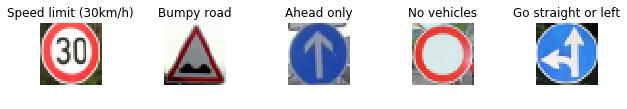

In [44]:
#Show Original
import glob
import cv2

my_images = sorted(glob.glob('./test_signs/*.png'))
my_labels = np.array([1, 22, 35, 15, 37])

test_images = []
test_labels = []
for my_image in my_images:
    img = cv2.cvtColor(cv2.imread(my_image), cv2.COLOR_BGR2RGB)
    test_images.append(img)

for idx in my_labels:
    test_labels.append(ds_names.loc[idx].SignName)

fig, axs = plt.subplots(1,5, figsize=(10, 20))
axs = axs.ravel()
plt.subplots_adjust(wspace=1, hspace=None)
i = 0
#Loop for showing images
for _ in range (len(test_images)):

    axs[i].imshow(test_images[i])
    axs[i].axis('off')
    axs[i].set_title(test_labels[i])
    i += 1
  


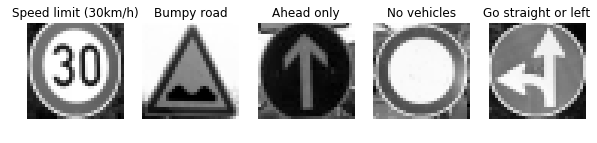

In [45]:
test_images_gray = []
test_images_gray= normalize_gray_pipeline(test_images)

fig, axs = plt.subplots(1,5, figsize=(10, 20))
axs = axs.ravel()
i = 0
for _ in range (len(test_images_gray)):

    axs[i].imshow(test_images_gray[i].squeeze(),cmap="gray")
    axs[i].axis('off')
    axs[i].set_title(test_labels[i])
    i += 1
  

### Predict the Sign Type for Each Image

In [46]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
#   saver = tf.train.import_meta_graph('./lenet.meta')
    saver.restore(sess, "./lenet")
    my_accuracy = evaluate(test_images_gray, my_labels)
    print("My Data Set Accuracy = {:.3f}".format(my_accuracy))

INFO:tensorflow:Restoring parameters from ./lenet
My Data Set Accuracy = 1.000


### Analyze Performance

In [47]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.
my_single_item_array = []
my_single_item_label_array = []

for i in range(5):
    my_single_item_array.append(test_images_gray[i])
    my_single_item_label_array.append(my_labels[i])

    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())

        saver.restore(sess, "./lenet")
        my_accuracy = evaluate(my_single_item_array, my_single_item_label_array)
        print('Image {}'.format(i+1))
        print("Image Accuracy = {:.3f}".format(my_accuracy))
        print()

INFO:tensorflow:Restoring parameters from ./lenet
Image 1
Image Accuracy = 1.000

INFO:tensorflow:Restoring parameters from ./lenet
Image 2
Image Accuracy = 1.000

INFO:tensorflow:Restoring parameters from ./lenet
Image 3
Image Accuracy = 1.000

INFO:tensorflow:Restoring parameters from ./lenet
Image 4
Image Accuracy = 1.000

INFO:tensorflow:Restoring parameters from ./lenet
Image 5
Image Accuracy = 1.000



### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [48]:
def plot_figures(figures, nrows = 1, ncols=1, labels=None):
    fig, axs = plt.subplots(ncols=ncols, nrows=nrows, figsize=(12, 14))
    axs = axs.ravel()
    for index, title in zip(range(len(figures)), figures):
        axs[index].imshow(figures[title], plt.gray())
        if(labels != None):
           axs[index].set_title(labels[index])
        else:
            axs[index].set_title(title)
            
        axs[index].set_axis_off()
        
    plt.tight_layout()

INFO:tensorflow:Restoring parameters from ./lenet


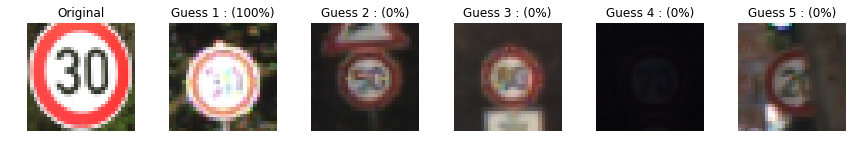

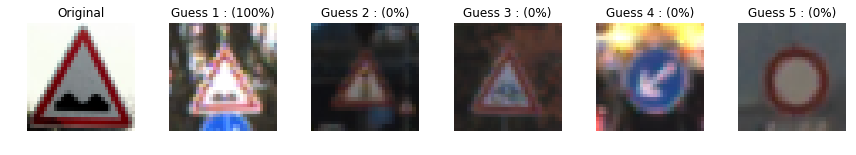

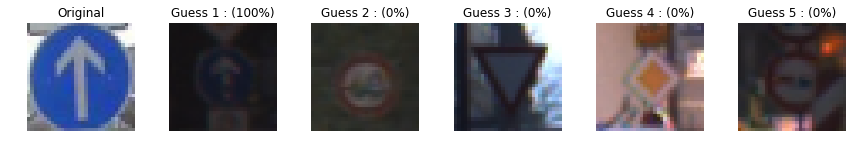

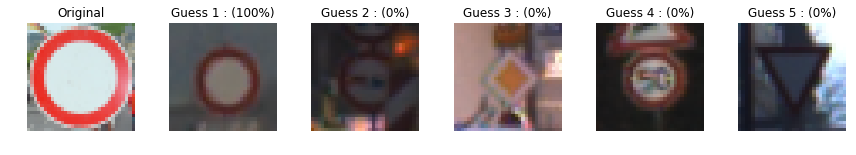

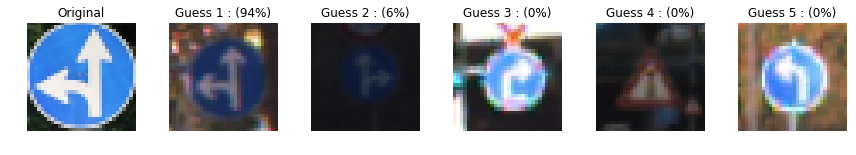

In [49]:
k_size = 5
softmax_logits = tf.nn.softmax(logits)
top_k = tf.nn.top_k(softmax_logits, k=k_size)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver.restore(sess, "./lenet")
    my_softmax_logits = sess.run(softmax_logits, feed_dict={x: test_images_gray, keep_prob: 1.0})
    my_top_k = sess.run(top_k, feed_dict={x: test_images_gray, keep_prob: 1.0})


    for i in range(5):
        figures = {}
        labels = {}
        
        figures[0] = test_images[i]
        labels[0] = "Original"
        
        for j in range(k_size):
            labels[j+1] = 'Guess {} : ({:.0f}%)'.format(j+1, 100*my_top_k[0][i][j])
            figures[j+1] = X_valid[np.argwhere(y_valid == my_top_k[1][i][j])[0]].squeeze()
 
        plot_figures(figures, 1, 6, labels)
  

### Traffic Sİgn Classifier



### Data Set Summary Exploration
***
#### 1. Summary of Data
* The size of training set is 139196
* The size of the validation set is 17640
* The size of test set is 50520 
* The shape of a traffic sign image is 32x32x1
* The number of unique classes/labels in the data set is 43

* Random images from dataset
<img src="./images/sampledatasetimages.png"  height ="40%" width="60%">

> The distribution of images for each data set shown in bars (Data augmentation included)
***

#### Train
***

<img src="./images/class_of_train.png"  height ="40%" width="60%">

#### Valid
***

<img src="./images/class_of_valid.png"  height ="40%" width="60%"> 

#### Test
***

<img src="./images/class_of_test.png"  height ="40%" width="60%">
<end>
    
***

### Design and Test a Model Architecture
***

#### Pipeline of preprocess
1. I decided to convert the images to grayscale and normalized them to increase accuracy. It is more easy to train normalized images. And most of image processing functions accepts only grayscaled images
2. I made some preprocess steps to increase size of dataset. They are flipping, rotating and sharping
3. After the data augmentation:
    - X_train size = 139196
    - X_valid size = 17640
    - X_test size  = 50520
    - Number of Classes = 43
 
<img src="./images/preprocessAll.png"  height ="100%" width="100%">

#### Model Architecture 
*** 

> The model that I used based on LeNet which is developed by Yann LeCun. I just added 1 conv layer, 2 fully connected layer and change the order of pooling layers.
Also I used dropout method to prevent overfitting.
   
  
| Layer         		|     Description	        					| 
|:---------------------:|:---------------------------------------------:| 
| Input         		| 32x32x1 Grayscale image   					| 
| Conv1 5x5x6    	 	| 1x1 stride, valid padding, outputs: 28x28x6 	|
| RELU					|												|
| Max pooling	      	| 2x2 stride, 2x2 kernel     outputs: 14x14x6 	|
| Conv2 5x5x16      	| 1x1 stride, valid padding, outputs: 10x10x16 	|
| RELU					|												|
| Conv3 5x5x6    	 	| 1x1 stride, valid padding, outputs: 8x8x32 	|
| RELU					|												|
| Max pooling	      	| 2x2 stride, 2x2 kernel     outputs: 4x4x32 	|
| Flatten 				| Output: 512									|
| FC1					| Input: 521 Output: 256						|
| RELU					|												|
| Dropout 				| Keep prob = 0.5  								|
| FC2					| Input: 256 Output: 128						|
| RELU					|												|
| Dropout 				| Keep prob = 0.5  								|
| FC3					| Input: 128 Output: 64 						|
| RELU					|												|
| Dropout 				| Keep prob = 0.5  								|
| FC2					| Input: 64 Output: 43  						|
|	 				  	|												|



#### Training
***
The below parameters are similar to the ones used in LeNet. 

   - EPOCHS = 25
   - BATCH_SIZE = 128
   - learning rate = 0.001
   - Dropout Probability = 0.5
   - The name of model = vefakNet
   - Normalizer = Softmax
   - Optimizer = Adam
    

#### Results

My final model results were:
* training set accuracy of **%99.6**
* validation set accuracy of **%95.7**
* test set accuracy of **%95.1**

If an iterative approach was chosen:
* What was the first architecture that was tried and why was it chosen?
   
  I used LeNet firstly which is recommended by instructors
* What were some problems with the initial architecture?
  
  There is no dropout layers which can cause overfitting.
* How was the architecture adjusted and why was it adjusted? Typical adjustments 
  
  I added one more conv and two more fully connected layer. So the number of learning parameters are greatly increased. Then I added droput layer with keep prob =0.5. Also I tried it with 0.25, 0.40 and 0.70 but 0.5 is the best one.
 
* Which parameters were tuned? How were they adjusted and why?
  
  I tuned dropout, number of images in dataset, learning rate, batch size and epoch. Increasing batch size, dataset and epochs effected in goodway. I tried different value of learning rate and 0.001 is gave best result
    
* What are some of the important design choices and why were they chosen? For example, why might a convolution layer work well with this problem? How might a dropout layer help with creating a successful model?
  
  The dataset consist of conv layers. The best and easiest option to obtain the information from images is conv layers. Droput is a great technique for overfitting. It kills random weights. 

If a well known architecture was chosen:
* What architecture was chosen?
    
    GoogLeNet
* Why did you believe it would be relevant to the traffic sign application?
    
    It has large size of parameters but thanks to its architecture it doesnot affect computational cost. GoogLeNet also known for classiying images well.
* How does the final model's accuracy on the training, validation and test set provide evidence that the model is working well?
   
   We can say that the model works well because the results are consistent among themselves.
 

### Test a Model on New Images

#### 1. The five traffic sign images to be tested

Here are five German traffic signs that I found on the web:

![alt text](./images/testImages_german.png "Test Images")



#### 2. Predictions

Here are the results of the prediction:

| Image			        |     Prediction	        					| 
|:---------------------:|:---------------------------------------------:| 
| Speed Limit (30km/h)  | Speed Limit (30km/h) 							| 
| Bumpy Road 			| Bumpy Road 									|
| Ahead Only			| Ahead Only									|
| No Vehicles      		| No Vehicles					 				|
| Go straight or left	| Go straight or left   						|


The model was able to correctly guess 5 of the 5 traffic signs, which gives an accuracy of 100%. 

**Output of performance analysis:**
```python
INFO:tensorflow:Restoring parameters from ./lenet
Image 1
Image Accuracy = 1.000

INFO:tensorflow:Restoring parameters from ./lenet
Image 2
Image Accuracy = 1.000

INFO:tensorflow:Restoring parameters from ./lenet
Image 3
Image Accuracy = 1.000

INFO:tensorflow:Restoring parameters from ./lenet
Image 4
Image Accuracy = 1.000

INFO:tensorflow:Restoring parameters from ./lenet
Image 5
Image Accuracy = 1.000
```

#### 3. Softmax probabilities for each prediction.  
> Instead of table I used figures to represent softmax probabilities for each test images
Here results:

![alt text](./images/guess1.png "Speed Limit (30km/h)")
![alt text](./images/guess2.png "Bumpy Road")
![alt text](./images/guess3.png "Ahead Only")
![alt text](./images/guess4.png "No Vehicles")
![alt text](./images/guess5.png "Go straight or left")


